In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
df = pd.read_csv('spam.csv', encoding='latin-1') #to avoid encoding errors
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
#removed unnecessary columns and renamed
df = df[['v1', 'v2']]  
df.columns = ['label', 'message'] 

In [12]:
df['label'] = df['label'].map({'ham':0, 'spam':1})

In [13]:
#convert each message into a vector of word counts

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])

In [14]:
y = df['label']

In [22]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LogisticRegression(class_weight='balanced')

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [23]:
y_pred = model.predict(X_test)



print("Accuracy:", accuracy_score(y_test, y_pred)) #model correctly classified 98.38% of the emails in the test set.
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred)) 
print("\nClassification Report:\n", classification_report(y_test, y_pred))
                                                                           


Accuracy: 0.9838565022421525

Confusion Matrix:
 [[961   4]
 [ 14 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.97      0.91      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



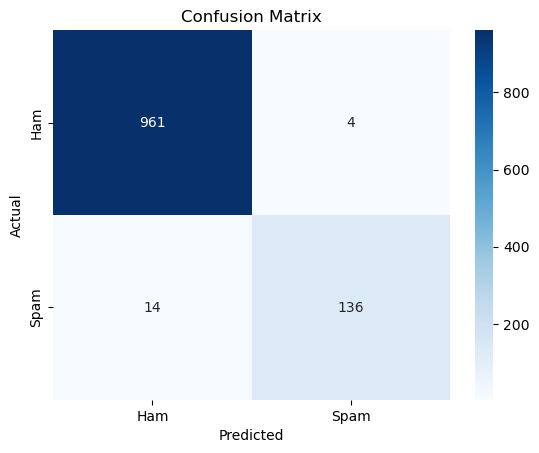

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()